# Daten von MongoDB direkt laden
Zum Laden der Daten von der MongoDB muss man im HS-VPN sein!
intro in MongoDB-Queries: [click me](https://docs.mongodb.com/manual/tutorial/query-documents/)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pymongo import MongoClient
import mongodb_connection

In [11]:
from datetime import datetime

In [29]:
client = MongoClient(mongodb_connection.connectionstring)
db = client.DMG_CELOS_MOBILE_V3_CA
collection = db["values"]
# for a first, get documents between 26.11.2019, 9:30 and 26.11.2019, 12:00
# only get documents with ValueID = 12430012063.X1_Axis.Actual_Position_MCS
vID = "12430012063.X1_Axis.Actual_Position_MCS"
start = datetime(2019,11,26,9,30)
end = datetime(2019,11,26,23,59)
cursor = collection.find({
    'ValueID' : "12430012063.X1_Axis.Actual_Position_MCS",
    'timeStamp' : {'$gt':start, '$lt':end} # $gt: greater than, $lt: less than
})
df = pd.DataFrame(columns=['value','time'])
i = 0
for item in cursor:
    df.loc[i] = [item['value_number']]+[item['timeStamp']]
    i+=1
print(df.shape)

(5673, 2)


In [30]:
df.head()

,value,time
0,351.07,2019-11-26 12:00:02.860
1,224.81,2019-11-26 12:00:03.001
2,91.48,2019-11-26 12:00:03.190
3,2.20,2019-11-26 12:00:03.417
4,1.53,2019-11-26 12:00:03.590


c:\program files\python36\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


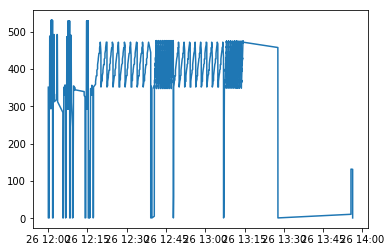

In [31]:
plt.plot(df['time'],df['value'])
plt.show()